### Check requirement Libraries installed already


```python
import subprocess
import sys
import importlib

# List of required packages
required_packages = [
    "requests",
    "python-dotenv"
]

def check_and_install_packages(packages):
    for package in packages:
        try:
            importlib.import_module(package)
            print(f"{package} is already installed.")
        except ImportError:
            print(f"{package} is not installed. Installing now...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install required packages
check_and_install_packages(required_packages)
```

In [2]:
import subprocess
import sys
import importlib

# List of required packages
required_packages = [
    "requests",
    "python-dotenv",
    "pandas",
    "geopandas",
    "matplotlib",
    "numpy"
]

def check_and_install_packages(packages):
    for package in packages:
        try:
            importlib.import_module(package)
            print(f"{package} is already installed.")
        except ImportError:
            print(f"{package} is not installed. Installing now...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install required packages
check_and_install_packages(required_packages)

requests is already installed.
python-dotenv is not installed. Installing now...
pandas is already installed.
geopandas is already installed.
matplotlib is already installed.
numpy is already installed.


In [3]:


# ############################################################

# Your main script starts here
import requests
from requests.auth import HTTPBasicAuth
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv(dotenv_path="../../.env")

# Get credentials from environment variables
username = os.getenv("GEOSERVER_USERNAME")
password = os.getenv("GEOSERVER_PASSWORD")

print('username ', username)

# Define the URL and headers
url = "http://localhost:8888/geoserver/rest/workspaces"
headers = {
    "accept": "application/json",
    "content-type": "application/json"
}

# Make the GET request with authentication
response = requests.get(url, headers=headers, auth=HTTPBasicAuth(username, password))
workspaces_list = []
# Check if the request was successful
if response.status_code == 200:
    workspaces = response.json()
    print(workspaces['workspaces']['workspace'])
else:
    print(f"Failed to get workspaces: {response.status_code}")


username  admin
[{'name': 'cite', 'href': 'http://localhost:8888/geoserver/rest/workspaces/cite.json'}, {'name': 'tiger', 'href': 'http://localhost:8888/geoserver/rest/workspaces/tiger.json'}, {'name': 'nurc', 'href': 'http://localhost:8888/geoserver/rest/workspaces/nurc.json'}, {'name': 'sde', 'href': 'http://localhost:8888/geoserver/rest/workspaces/sde.json'}, {'name': 'it.geosolutions', 'href': 'http://localhost:8888/geoserver/rest/workspaces/it.geosolutions.json'}, {'name': 'topp', 'href': 'http://localhost:8888/geoserver/rest/workspaces/topp.json'}, {'name': 'sf', 'href': 'http://localhost:8888/geoserver/rest/workspaces/sf.json'}, {'name': 'montreal', 'href': 'http://localhost:8888/geoserver/rest/workspaces/montreal.json'}, {'name': 'ne', 'href': 'http://localhost:8888/geoserver/rest/workspaces/ne.json'}]


### Sort Workspaces







In [4]:
import pandas as pd
import geopandas as gpd

df = pd.DataFrame(workspaces['workspaces']['workspace'])


In [5]:
# Sort the DataFrame by the 'name' column
df_sorted = df.sort_values(by='name')

In [6]:
# Convert to a GeoDataFrame (if needed for further geospatial operations)
gdf = gpd.GeoDataFrame(df_sorted)


In [7]:
# Print the sorted DataFrame
print(gdf)


              name                                               href
0             cite  http://localhost:8888/geoserver/rest/workspace...
4  it.geosolutions  http://localhost:8888/geoserver/rest/workspace...
7         montreal  http://localhost:8888/geoserver/rest/workspace...
8               ne  http://localhost:8888/geoserver/rest/workspace...
2             nurc  http://localhost:8888/geoserver/rest/workspace...
3              sde  http://localhost:8888/geoserver/rest/workspace...
6               sf  http://localhost:8888/geoserver/rest/workspace...
1            tiger  http://localhost:8888/geoserver/rest/workspace...
5             topp  http://localhost:8888/geoserver/rest/workspace...


In [8]:
# Display the DataFrame with nice formatting
print(gdf.to_string(index=False))

           name                                                                 href
           cite            http://localhost:8888/geoserver/rest/workspaces/cite.json
it.geosolutions http://localhost:8888/geoserver/rest/workspaces/it.geosolutions.json
       montreal        http://localhost:8888/geoserver/rest/workspaces/montreal.json
             ne              http://localhost:8888/geoserver/rest/workspaces/ne.json
           nurc            http://localhost:8888/geoserver/rest/workspaces/nurc.json
            sde             http://localhost:8888/geoserver/rest/workspaces/sde.json
             sf              http://localhost:8888/geoserver/rest/workspaces/sf.json
          tiger           http://localhost:8888/geoserver/rest/workspaces/tiger.json
           topp            http://localhost:8888/geoserver/rest/workspaces/topp.json


In [9]:
# Style the DataFrame
styled_df = gdf.style.set_properties(**{'background-color': 'black', 'color': 'white'})

# Display the styled DataFrame
styled_df

,name,href
0,cite,http://localhost:8888/geoserver/rest/workspaces/cite.json
4,it.geosolutions,http://localhost:8888/geoserver/rest/workspaces/it.geosolutions.json
7,montreal,http://localhost:8888/geoserver/rest/workspaces/montreal.json
8,ne,http://localhost:8888/geoserver/rest/workspaces/ne.json
2,nurc,http://localhost:8888/geoserver/rest/workspaces/nurc.json
3,sde,http://localhost:8888/geoserver/rest/workspaces/sde.json
6,sf,http://localhost:8888/geoserver/rest/workspaces/sf.json
1,tiger,http://localhost:8888/geoserver/rest/workspaces/tiger.json
5,topp,http://localhost:8888/geoserver/rest/workspaces/topp.json


In [10]:
# Define a function to apply styles
def style_specific_columns(x):
    color = 'background-color: black;'
    red_text = 'color: red;'
    blue_text = 'color: blue;'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1['name'] = red_text
    df1['href'] = blue_text
    return df1

# Apply the style
styled_df = gdf.style.apply(style_specific_columns, axis=None)

# Display the styled DataFrame
styled_df

,name,href
0,cite,http://localhost:8888/geoserver/rest/workspaces/cite.json
4,it.geosolutions,http://localhost:8888/geoserver/rest/workspaces/it.geosolutions.json
7,montreal,http://localhost:8888/geoserver/rest/workspaces/montreal.json
8,ne,http://localhost:8888/geoserver/rest/workspaces/ne.json
2,nurc,http://localhost:8888/geoserver/rest/workspaces/nurc.json
3,sde,http://localhost:8888/geoserver/rest/workspaces/sde.json
6,sf,http://localhost:8888/geoserver/rest/workspaces/sf.json
1,tiger,http://localhost:8888/geoserver/rest/workspaces/tiger.json
5,topp,http://localhost:8888/geoserver/rest/workspaces/topp.json


In [33]:
import matplotlib.pyplot as plt
import numpy as np

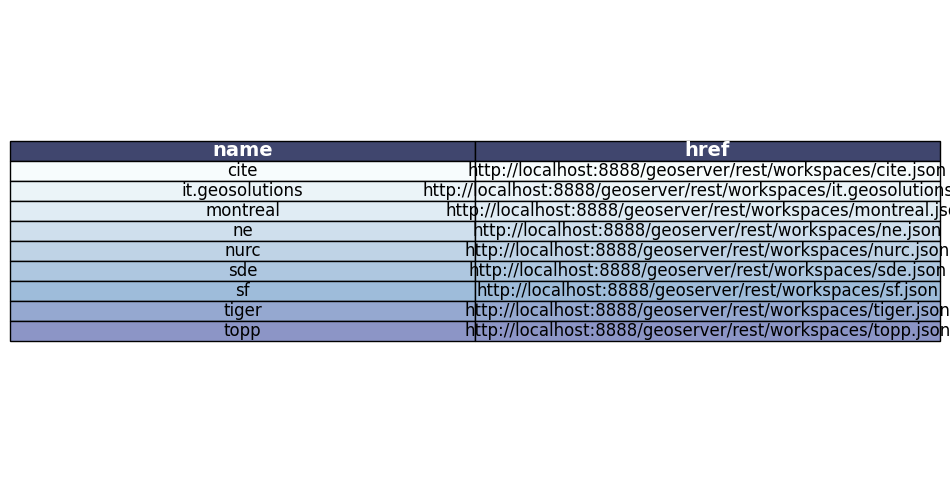

In [34]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=gdf.values, colLabels=gdf.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Colorize the table
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(gdf)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='w')
    else:
        cell.set_facecolor(colors[key[0]-1])

plt.show()